# Hard SVM Implementation for Determining Credit Card Fraud.

Dataset: [Kaggle-Credit Card Fraud Dataset](https://paperswithcode.com/dataset/kaggle-credit-card-fraud-dataset)

_Data has already undergone PCA and preprocessing to anonymize the data._

The original classes for the data are:

* Fraudulent Transaction: _+1_

* Non-fraudulent Transaction: _0_

In [3]:
!pip install scikit-learn
!pip install seaborn



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: C:\Users\DaneShuler\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: C:\Users\DaneShuler\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import precision_recall_curve, average_precision_score
import seaborn as sns

Load and modify the class values for SVM.

The modified classes for the data are:

* Fraudulent Transaction: _+1_

* Non-fraudulent Transaction: _-1_

In [5]:
data = pd.read_csv("creditcard.csv")

data["Class"] = np.where(data["Class"] <= 0, -1, 1)

data.shape

(284807, 31)

Preview the data

In [6]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,-1
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,-1
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,-1
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,-1
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,-1


## Split the Data for Training and Testing

In [7]:

from sklearn.model_selection import train_test_split
X = data.drop("Class", axis=1).to_numpy()
y = data["Class"].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standardize the Data

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Hard SVM Loss Function

In [9]:
def hard_hinge_loss(X, y, weights, bias):
    distances = 1 - y * (np.dot(X, weights) + bias)
    distances = np.maximum(0, distances)  # Only count violations
    return 0.5 * np.dot(weights, weights) + np.sum(distances)


## Hard SVM Training (Gradient Descent)

In [10]:
def fit_hard_svm(X, y, lr=0.001, epochs=1000):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0

    for epoch in range(epochs):
        for i in range(n_samples):
            condition = y[i] * (np.dot(X[i], weights) + bias) >= 1
            if condition:
                dw = weights
                db = 0
            else:
                dw = weights - y[i] * X[i]
                db = -y[i]
            weights -= lr * dw
            bias -= lr * db

        # Optional: print loss every 100 epochs
        if epoch % 100 == 0:
            loss = hard_hinge_loss(X, y, weights, bias)
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    return weights, bias


## Predict Function

In [11]:
def predict(X, weights, bias):
    return np.sign(np.dot(X, weights) + bias)


## Testing

In [13]:
weights, bias = fit_hard_svm(X_train, y_train, lr=0.0001, epochs=1000)
y_pred = predict(X_test, weights, bias)

from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Epoch 0, Loss: 668.7092
Epoch 100, Loss: 668.8044
Epoch 200, Loss: 668.5833
Epoch 300, Loss: 668.5504
Epoch 400, Loss: 668.9870
Epoch 500, Loss: 669.2339
Epoch 600, Loss: 668.8643
Epoch 700, Loss: 668.7917
Epoch 800, Loss: 668.5503
Epoch 900, Loss: 668.9616
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy: 0.9983


C:\Users\DaneShuler\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DaneShuler\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DaneShuler\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metric

## Area Under the Precision-Recall Curve Metric:

AUPRC (Area under Precision-Recall Curve): 0.7061


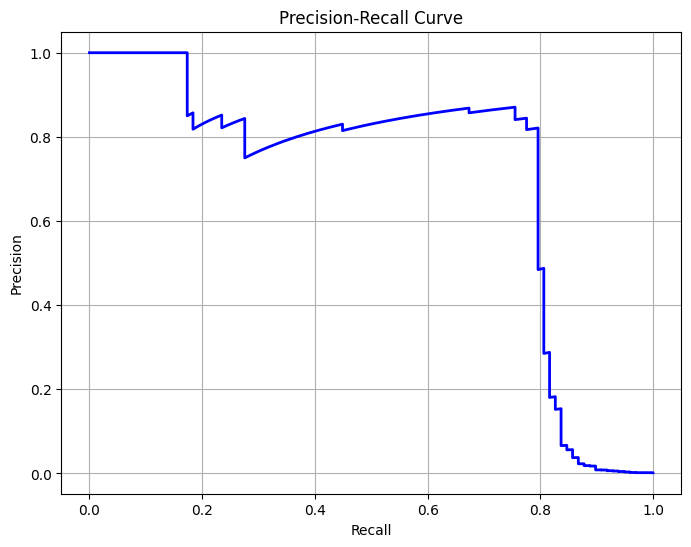

In [15]:
# Get decision function scores (if using sklearn SVC)
# If using custom SVM, use raw outputs from np.dot(X, weights) + bias
# Here, let's assume you're using a numpy-based model
y_scores = np.dot(X_test, weights) + bias  # ← use model output before thresholding

# AUPRC value
ap_score = average_precision_score(y_test, y_scores)
print(f"AUPRC (Area under Precision-Recall Curve): {ap_score:.4f}")

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

In [16]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Assuming you have:
# y_test = true labels
# y_scores = raw decision function output (e.g. np.dot(X_test, weights) + bias)

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
ap_score = average_precision_score(y_test, y_scores)

print(f"AUPRC: {ap_score:.4f}")
print("\nThreshold\tPrecision\tRecall")
for t, p, r in zip(thresholds[::100], precision[::100], recall[::100]):
    print(f"{t:.4f}\t\t{p:.4f}\t\t{r:.4f}")


AUPRC: 0.7061

Threshold	Precision	Recall
-1.1155		0.0017		1.0000
-1.0507		0.0017		1.0000
-1.0403		0.0017		1.0000
-1.0349		0.0017		1.0000
-1.0313		0.0017		1.0000
-1.0283		0.0017		1.0000
-1.0264		0.0017		1.0000
-1.0252		0.0017		1.0000
-1.0240		0.0017		1.0000
-1.0228		0.0017		1.0000
-1.0217		0.0018		1.0000
-1.0208		0.0018		1.0000
-1.0202		0.0018		1.0000
-1.0195		0.0018		1.0000
-1.0189		0.0018		1.0000
-1.0183		0.0018		1.0000
-1.0179		0.0018		1.0000
-1.0175		0.0018		1.0000
-1.0170		0.0018		1.0000
-1.0167		0.0018		1.0000
-1.0164		0.0018		1.0000
-1.0160		0.0018		1.0000
-1.0157		0.0018		1.0000
-1.0155		0.0018		1.0000
-1.0152		0.0018		1.0000
-1.0150		0.0018		1.0000
-1.0147		0.0018		1.0000
-1.0146		0.0018		1.0000
-1.0144		0.0018		1.0000
-1.0141		0.0018		0.9898
-1.0140		0.0018		0.9898
-1.0138		0.0018		0.9898
-1.0136		0.0018		0.9898
-1.0134		0.0018		0.9898
-1.0133		0.0018		0.9898
-1.0131		0.0018		0.9898
-1.0130		0.0018		0.9898
-1.0129		0.0018		0.9796
-1.0127		0.0018		0.9796
-1.0126		0.0018		0.979